In [41]:
%matplotlib inline
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [6]:
sp_en = spacy.load('en')

In [15]:
f = open('./pubmed_result_climate_change_korea.txt')

fr = f.read()

In [22]:
abstract_arglist = []
for n,l in enumerate(fr.split('\r\n\r\n')):
    key = 'Author information:'
    if l[0:len(key)] == key:
        abstract_arglist.append(n+1)

In [24]:
abstract_list = [x.replace('\n',' ') for x in np.array(fr.split('\r\n\r\n'))[abstract_arglist]]

abstract_sentences = []
for x in abstract_list:
    abstract_sentences += [i.strip() for i in x.split('. ') ]

In [25]:
X_train_sp = []
for sentence in abstract_sentences:
    X_train_sp += [' '.join([x.lemma_ for x in sp_en(unicode(sentence.decode("utf8")))])]

In [27]:
abstract_sentences[0]

'The Holocene variability in the East Asian summer monsoon (EASM) based on\r speleothem \xce\xb4(18)O records has inconsistencies in timing, duration, and expression\r of millennial-scale events among nearby regions, and even within the same cave.\r Here, we present another stalagmite \xce\xb4(18)O record with multi-decadal time\r resolution from the temperate Korean Peninsula (KP) for the last 5500 years in\r order to compare with Holocene millennial-scale EASM events from Southeast Asia'

In [26]:
X_train_sp[0]

u'the holocene variability in the east asian summer monsoon ( easm ) base on \r  speleothem \u03b4(18)o record have inconsistency in time , duration , and expression \r  of millennial - scale event among nearby region , and even within the same cave . \r  here , -PRON- present another stalagmite \u03b4(18)o record with multi - decadal time \r  resolution from the temperate korean peninsula ( kp ) for the last 5500 year in \r  order to compare with holocene millennial - scale easm event from southeast asia'

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer(stop_words='english',min_df=5)

In [30]:
bow = cv.fit_transform(X_train_sp)

In [33]:
x_train_mat = bow.toarray()

In [43]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

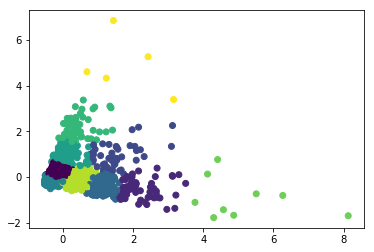

In [76]:
pca = PCA(n_components=2)
x_train_mat_pc = pca.fit_transform(x_train_mat)
km = KMeans(n_clusters=10)
cluster = km.fit_predict(x_train_mat_pc)
plt.scatter(x_train_mat_pc[:,0],x_train_mat_pc[:,1],c=cluster)

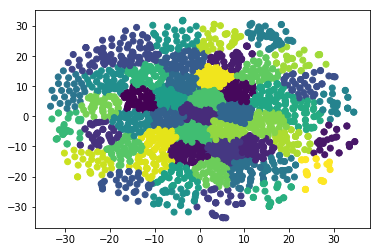

In [78]:
tnse = TSNE(random_state=0)
x_train_mat_tsne = tnse.fit_transform(x_train_mat)
km = KMeans(n_clusters=50)
cluster = km.fit_predict(x_train_mat_tsne)
plt.scatter(x_train_mat_tsne[:,0],x_train_mat_tsne[:,1],c=cluster)

In [83]:
pca = PCA(n_components=10)
x_train_mat_pc = pca.fit_transform(x_train_mat)
km = KMeans(n_clusters=100)
cluster = km.fit_predict(x_train_mat_pc)

In [86]:
from collections import Counter

In [91]:
#Counter(cluster)
np.argmax(Counter(cluster).values())

1

In [84]:
m = cluster == 1
len(np.array(abstract_sentences)[m])

722

In [85]:
np.array(abstract_sentences)[m]

array(['The estimates were then pooled through\r meta-analysis',
       'Odor generation frequency was in the order of acetaldehyde\r (68.8%)\xc2\xa0>\xc2\xa0ammonia (39.4%)\xc2\xa0>\xc2\xa0propionaldehyde (21.9%), which means the main\r substances generating the unpleasant odor at landfill site was recognized as\r aldehydes and ammonia due to combined effect of sludge-related facilities and\r meteorological conditions',
       'The relationship\r between concentrations of complex odor and designated offensive odor substances\r was analyzed statistically',
       'langsdorfii',
       'The circular plastid genome is 124,450 bp and contains\r 139 protein-coding, 28 tRNA and 6 rRNA genes',
       'The circular mitochondrial genome\r is 35,660 bp and contains 38 protein-coding, 25 tRNA and 3 rRNA genes',
       'The\r structure and gene content of the C',
       'langsdorfii plastid genome is similar to\r those of other species in the Fucales',
       'The plastid genomes of brown algae i